In [1]:
import pandas as pd
# Data Explorations
cust_demo = pd.read_csv("F:/TechM_Python/Day 2/class discussion/DataSets/cust_demo.csv")
cust_data = pd.read_csv("F:/TechM_Python/Day 2/class discussion/DataSets/cust_data.csv")
stores = pd.read_csv("F:/TechM_Python/Day 2/class discussion/DataSets/stores.csv")

FileNotFoundError: File b'F:/TechM_Python/Day 2/class discussion/DataSets/cust_data.csv' does not exist

In [2]:
# Binning
import numpy as np

cust_data.MonthlyIncome.fillna(cust_data.MonthlyIncome.mean(),inplace=True)

In [4]:
# Derive a varaible called PayBand
# cust_data.MonthlyIncome.describe().astype(str)
# If MI < 5000 : Pay Band I
# 5000 - 50000 : II
# 50000 - 200000 : III
# > 200000 : IV

MI = cust_data.MonthlyIncome

In [5]:
cust_data["PayBand"] = np.where((MI < 5000),"I",
   np.where((MI >= 5000) & (MI < 50000),"II",
      np.where((MI >= 50000) & (MI < 200000),"III",
         np.where((MI >= 200000),"IV","")
              )
           )
                               )

# np.where(cond, valueT, valueF)

In [6]:
s1 = pd.Series(["Pune,MH","Bengaluru,KA","Gurgaon,HR","Mumbai,MH","Kolkata,WB"])
s1.str.split(",")

0         [Pune, MH]
1    [Bengaluru, KA]
2      [Gurgaon, HR]
3       [Mumbai, MH]
4      [Kolkata, WB]
dtype: object

In [7]:
cust_demo.head(5)
# 1.
# See how many cat are there in Marital_Status
cust_demo["Martial_Status"] = np.where(cust_demo.Martial_Status == "Single",1,2)
# Convert Marital Status to MS_Num : 1 - Single, 2 - Married ... 
# 2. Split Location into two columns : City and State
Cols = cust_demo.Location.str.split(",",expand=True)
Cols.columns = ["City","State"]
t = pd.concat([cust_demo,Cols],axis=1).drop(columns=["Location"])
t.head()

,ID,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,City,State
0,4532,0,39,1,1.0,1,3,Gandhinagar,Gujarat
1,148736,0,52,2,0.0,0,3,Hyderabad,Andhra Pradesh
2,95965,0,62,2,0.0,0,2,Shimla,Himachal Pradesh
3,61759,0,42,1,1.0,1,1,Srinagar,JK
4,49806,0,41,1,1.0,0,3,Imphal,Manipur


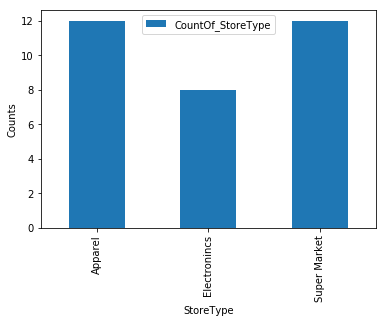

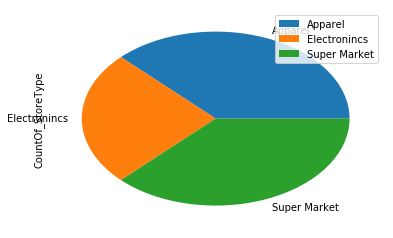

In [45]:
# Group By
# One Cat Variable
# Freq table of StoreType

# Step 1 : Gropuing
# DF.groupby(by = [])
_t = stores.groupby(by = ["StoreType"])
# _t : contains everything from the df + the grouping information

# Step 2 : Calculations : count, mean, sum, median, var, std
#_t["StoreType"].count()
#_t.StoreType.count()

Res = _t[["StoreType"]].count().add_prefix("CountOf_") # good for graphs!


#Res = _t[["StoreType"]].count().add_prefix("CountOf_").reset_index() # good for other operations
Res.plot(kind = "bar")
plt.ylabel("Counts")
Res.plot(kind = "pie",subplots=True)
plt.show()
# Task : 
# 1. tilt the x axis ticks to 45 degress
# 2. Remove the y axis label from pie chart

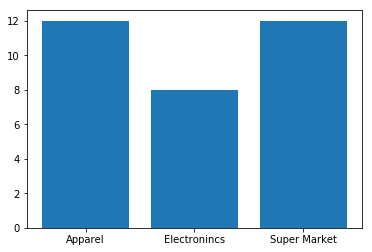

In [47]:
#Res.reset_index(inplace=True)
plt.bar(Res.StoreType,Res.CountOf_StoreType)
plt.show()
#plt.bar(y_pos, performance, align='center', alpha=0.5)


In [48]:
# Step 1
_t = stores.groupby(by = ["Location"])

# Step 2 
_t[["OperatingCost"]].sum().add_prefix("SumOf_").reset_index()

,Location,SumOf_OperatingCost
0,Chennai,129.5
1,Delhi,161.7
2,Kolkata,174.8
3,Mumbai,176.9


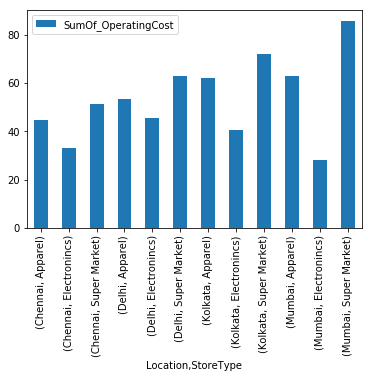

In [54]:
# Step 1
_t = stores.groupby(by = ["Location","StoreType"])

# Step 2 
Res = _t[["OperatingCost"]].sum().add_prefix("SumOf_")
Res.plot(kind = "bar")
plt.show()

In [63]:
Res2 = Res.reset_index()
Res3 = pd.melt(Res2,id_vars=['Location','StoreType'],var_name='Metric', value_name='Value')


In [64]:
from matplotlib import pyplot as plt
# Step 1
_t = stores.groupby(by = ["Location","StoreType"])

# Step 2 
_t[["OperatingCost","TotalSales"]].sum().add_prefix("SumOf_").reset_index()

,Location,StoreType,SumOf_OperatingCost,SumOf_TotalSales
0,Chennai,Apparel,44.8,915.4
1,Chennai,Electronincs,33.2,600.8
2,Chennai,Super Market,51.5,719.2
3,Delhi,Apparel,53.4,745.0
4,Delhi,Electronincs,45.4,306.7
5,Delhi,Super Market,62.9,726.0
6,Kolkata,Apparel,62.0,525.0
7,Kolkata,Electronincs,40.6,521.0
8,Kolkata,Super Market,72.2,566.4
9,Mumbai,Apparel,63.1,700.7


In [71]:
# Step 1
_t = stores.groupby(by = ["Location","StoreType"])

# Step 2 
_t[["OperatingCost","TotalSales"]].agg({"OperatingCost":"sum","TotalSales":"mean"}).reset_index().rename(columns = {"OperatingCost":"SumOf_OperatingCost","TotalSales":"MeanOf_TotalSales"})

,Location,StoreType,SumOf_OperatingCost,MeanOf_TotalSales
0,Chennai,Apparel,44.8,305.133333
1,Chennai,Electronincs,33.2,300.400000
2,Chennai,Super Market,51.5,239.733333
3,Delhi,Apparel,53.4,248.333333
4,Delhi,Electronincs,45.4,153.350000
5,Delhi,Super Market,62.9,242.000000
6,Kolkata,Apparel,62.0,175.000000
7,Kolkata,Electronincs,40.6,260.500000
8,Kolkata,Super Market,72.2,188.800000
9,Mumbai,Apparel,63.1,233.566667


In [72]:
stores.groupby(["Location","StoreType"])[["OperatingCost","TotalSales"]].agg({"OperatingCost":"sum","TotalSales":"mean"}).reset_index().rename(columns = {"OperatingCost":"SumOf_OperatingCost","TotalSales":"MeanOf_TotalSales"})

,Location,StoreType,SumOf_OperatingCost,MeanOf_TotalSales
0,Chennai,Apparel,44.8,305.133333
1,Chennai,Electronincs,33.2,300.400000
2,Chennai,Super Market,51.5,239.733333
3,Delhi,Apparel,53.4,248.333333
4,Delhi,Electronincs,45.4,153.350000
5,Delhi,Super Market,62.9,242.000000
6,Kolkata,Apparel,62.0,175.000000
7,Kolkata,Electronincs,40.6,260.500000
8,Kolkata,Super Market,72.2,188.800000
9,Mumbai,Apparel,63.1,233.566667


In [73]:
cust_data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,PayBand
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0,II
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0,II
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0,II
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0,II
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0,I


In [74]:
cust_demo.head()

,ID,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address
0,4532,"Gandhinagar,Gujarat",0,39,1,1.0,1,3
1,148736,"Hyderabad,Andhra Pradesh",0,52,2,0.0,0,3
2,95965,"Shimla,Himachal Pradesh",0,62,2,0.0,0,2
3,61759,"Srinagar,JK",0,42,1,1.0,1,1
4,49806,"Imphal,Manipur",0,41,1,1.0,0,3


In [76]:
# Inner Join
# All columns and only common rows
InnerJoin = pd.merge(left=cust_demo.loc,
         right=cust_data,
         # common column in both tables can have same name
         on = ["ID"],
         # also, it can have different names in few cases
         # left_on = [], right_on = []
         how = "inner" # "outer", "left", "right"
         
        )
InnerJoin.head()
# 1. only 2 tables can be merged at a given time.
# 2. Subsetting should be done first 

,ID,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,PayBand
0,4532,"Gandhinagar,Gujarat",0,39,1,1.0,1,3,0,1.158218,0,0.257593,2600.0,2,3,0,1,I
1,148736,"Hyderabad,Andhra Pradesh",0,52,2,0.0,0,3,0,0.437826,0,0.280787,6000.0,8,0,1,0,II
2,95965,"Shimla,Himachal Pradesh",0,62,2,0.0,0,2,0,0.000000,0,0.027072,10933.0,6,0,0,0,II
3,61759,"Srinagar,JK",0,42,1,1.0,1,1,0,0.976921,0,0.469506,5000.0,6,0,3,0,II
4,49806,"Imphal,Manipur",0,41,1,1.0,0,3,1,0.822651,0,0.855486,7500.0,9,0,2,0,II


In [78]:
# Full Join
# All columns and all rows
cust360 = pd.merge(left=cust_demo,right=cust_data,on = "ID" ,how="outer",indicator=True)

In [81]:
# Exporting
import os
os.getcwd()

des_path = 'F:/TechM_Python/Day 4'

In [82]:
os.chdir(des_path)

In [85]:
os.getcwd()

'F:\\TechM_Python\\Day 4'

In [87]:
cust360.to_csv("cust_full.csv",index=False)

In [88]:
cust360.to_excel("cust_full.xlsx",index=False)

In [89]:
cust360.to_pickle("cust_full")

In [90]:
from_pickle = pd.read_pickle("cust_full")

In [92]:
x = pd.Series([12,34,56,78,90,34,5,6,7,3,2])

In [93]:
x.to_pickle("some_random_series")

In [94]:
# Scatter plot

# Generate random numbers
import numpy as np

In [114]:
np.random.random(size=10)

array([0.58845958, 0.54763045, 0.45786402, 0.41263965, 0.33220179,
       0.18408889, 0.09909008, 0.94718317, 0.35258228, 0.34710198])

In [183]:
np.random.randint(40,size=10)

array([20,  2, 34, 12, 37, 38, 15, 11, 36,  8])

In [188]:
# Broadcasting
np.random.random(10) * 10

array([6.44809266, 2.4912027 , 7.95439826, 9.84997994, 9.68497862,
       9.81731563, 4.99714222, 6.46183157, 6.29302362, 6.67360976])

In [190]:
arr1 = np.array([12,54,36,78,90])
arr2 = np.random.randint(100,size=5)

In [191]:
arr1

array([12, 54, 36, 78, 90])

In [192]:
arr2

array([56, 90, 69, 94, 59])

In [193]:
arr1 + arr2

array([ 68, 144, 105, 172, 149])

In [196]:
arr3 = np.array([[12,7,4,2,9],[1,6,4,3,9],[2,7,4,6,7]])
arr3

array([[12,  7,  4,  2,  9],
       [ 1,  6,  4,  3,  9],
       [ 2,  7,  4,  6,  7]])

In [197]:
arr3 * np.array([10,20,30,40,50])

array([[120, 140, 120,  80, 450],
       [ 10, 120, 120, 120, 450],
       [ 20, 140, 120, 240, 350]])

In [34]:
data = pd.Series(np.random.random(size=10)*10).round(2)
ix = data.index.to_series()
data2 = pd.Series(np.random.randint(500,size=10)*10).round(2)

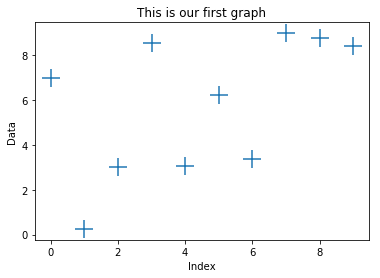

In [40]:
plt.scatter(x=ix,y=data,marker="+",s=300)
plt.title("This is our first graph")
plt.xlabel("Index")
plt.ylabel("Data")
#plt.xlim(-1,20)
#plt.ylim()
plt.show()

# y = mx + C

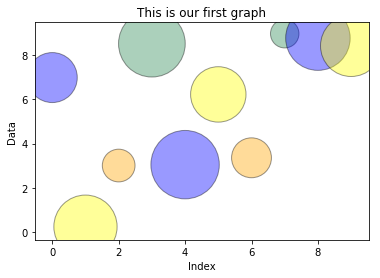

In [39]:
plt.scatter(x=ix,y=data,edgecolors="black",c=["blue","yellow","orange","seagreen"],s=data2,alpha=0.4)
plt.title("This is our first graph")
plt.xlabel("Index")
plt.ylabel("Data")
#plt.xlim(-1,20)
#plt.ylim()
plt.show()

In [8]:
# Scatter plot between TotalSales on Y and OperatingCost on X
# Income vs Expesnes
import seaborn as sns
import matplotlib as mp
from matplotlib import pyplot as plt
OC = stores.OperatingCost
TS = stores.TotalSales

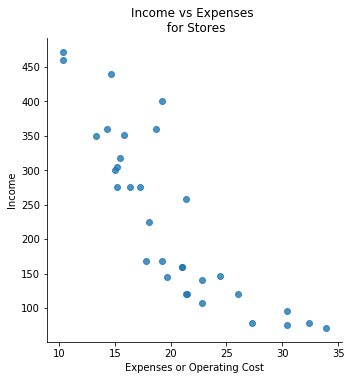

In [16]:
sns.lmplot(x="OperatingCost",y="TotalSales",data=stores,fit_reg=False)
plt.title("Income vs Expenses \n for Stores")
plt.xlabel("Expenses or Operating Cost")
plt.ylabel("Income")
plt.show()

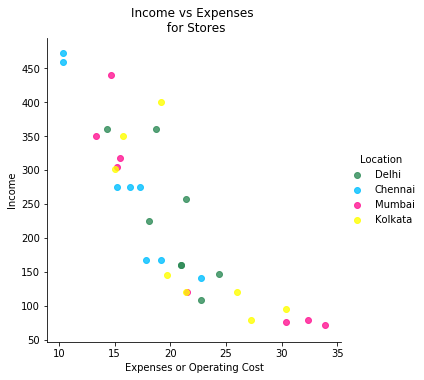

In [25]:
sns.lmplot(x="OperatingCost",y="TotalSales",data=stores,fit_reg=False,hue="Location",palette=["seagreen","deepskyblue","deeppink","yellow"])
plt.title("Income vs Expenses \n for Stores")
plt.xlabel("Expenses or Operating Cost")
plt.ylabel("Income")
plt.show()

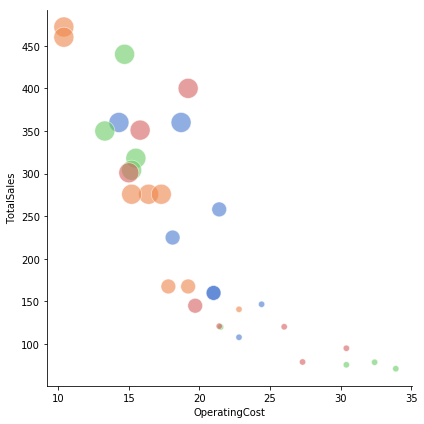

In [29]:
sns.relplot(x="OperatingCost",y="TotalSales",data=stores,hue="Location", size="Staff_Cnt",
            sizes=(40, 400), alpha=.6, palette="muted",legend=False,height=6)

In [47]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [48]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)
data
# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(y=data, x=data.index, size=15, line_color="black", fill_color="deepskyblue")

show(p) # show the results

In [53]:
# create a new plot using figure
p = figure(plot_width=400, plot_height=400)

# add a square renderer with a size, color, alpha, and sizes
p.square(y=data, x=ix, size = [100,30,40,21,10,5,3,10,60,10],color="darkblue", alpha=0.6)

show(p) # show the results

In [93]:
a=stores.groupby(["Location"])[["TotalSales"]].sum().add_prefix("SumOf_").reset_index()

In [95]:
b = a.SumOf_TotalSales/stores.TotalSales.sum() * 100
b = b.round(2)

In [96]:
a["PctCount"] = b
a

,Location,SumOf_TotalSales,PctCount
0,Chennai,2235.4,30.28
1,Delhi,1777.7,24.08
2,Kolkata,1612.4,21.84
3,Mumbai,1757.6,23.81


# Wide to long

In [83]:
df2=pd.melt(a,id_vars=['Location'],var_name='Metric', value_name='Value')
df2

,Location,Metric,Value
0,Chennai,SumOf_TotalSales,2235.40
1,Delhi,SumOf_TotalSales,1777.70
2,Kolkata,SumOf_TotalSales,1612.40
3,Mumbai,SumOf_TotalSales,1757.60
4,Chennai,PctTotalSales,30.28
5,Delhi,PctTotalSales,24.08
6,Kolkata,PctTotalSales,21.84
7,Mumbai,PctTotalSales,23.81


In [84]:
df3=df2.pivot(index='Location', columns='Metric', values='Value')
df3.reset_index()

Metric,Location,PctTotalSales,SumOf_TotalSales
0,Chennai,30.28,2235.4
1,Delhi,24.08,1777.7
2,Kolkata,21.84,1612.4
3,Mumbai,23.81,1757.6


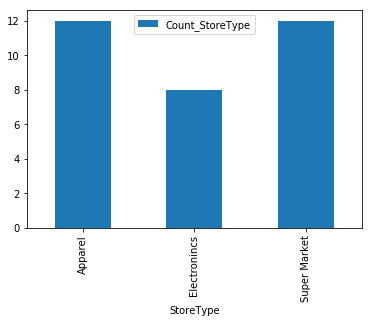

In [19]:
r = stores.groupby(["StoreType"])[["StoreType"]].count().add_prefix("Count_").plot(kind="bar")


In [22]:
# Step 1
_t = stores.groupby(by = ["Location","StoreType"])

# Step 2 
_t[["OperatingCost","TotalSales"]].agg({"OperatingCost":"sum","TotalSales":"mean"}).rename(columns = {"OperatingCost":"SumOf_OperatingCost","TotalSales":"MeanOf_TotalSales"})

SumOf_OperatingCost  MeanOf_TotalSales
Location StoreType                                           
Chennai  Apparel                      44.8         305.133333
         Electronincs                 33.2         300.400000
         Super Market                 51.5         239.733333
Delhi    Apparel                      53.4         248.333333
         Electronincs                 45.4         153.350000
         Super Market                 62.9         242.000000
Kolkata  Apparel                      62.0         175.000000
         Electronincs                 40.6         260.500000
         Super Market                 72.2         188.800000
Mumbai   Apparel                      63.1         233.566667
         Electronincs                 28.0         395.000000
         Super Market                 85.8          88.966667

In [76]:
stores.sort_values("TotalSales",ascending=False).reset_index(drop=True).head(2)

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR115,Fashion Bazar,Apparel,Chennai,10.4,80,472.0,205,2.93,5.250,17.98,0,0,3,4
1,STR116,Digital Bazar,Electronincs,Chennai,10.4,80,460.0,215,3.00,5.424,17.82,0,0,3,4


In [71]:
cust_data.sort_values(["SeriousDlqin2yrs","MonthlyIncome"]).head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD
68,106130,0,0.386047,0,9809.0,0.0,7,0,1,0
98,89452,0,1.068215,6,1885.0,0.0,8,0,0,1
106,39892,0,0.933309,1,2254.0,0.0,10,0,0,0
135,60738,0,0.074657,2,687.0,0.0,9,0,0,0
146,114015,0,1.000000,0,152.0,0.0,2,0,0,0


In [83]:
# Apply : takes a user defined function and applies it on the data
storesNum = stores._get_numeric_data().iloc[0:3,0:3]
def SquareEverything(x):
    return(x ** 2)

In [84]:
storesNum

,OperatingCost,Staff_Cnt,TotalSales
0,21.0,60,160.0
1,21.0,60,160.0
2,22.8,40,108.0


In [85]:
storesNum.apply(func=SquareEverything)

,OperatingCost,Staff_Cnt,TotalSales
0,441.00,3600,25600.0
1,441.00,3600,25600.0
2,519.84,1600,11664.0


In [86]:
def Power(x,pwr = 1):
    return(x ** pwr)

In [118]:
storesNum.apply(func=Power,pwr = 2)

,OperatingCost,Staff_Cnt,TotalSales
0,441.00,3600,25600.0
1,441.00,3600,25600.0
2,519.84,1600,11664.0


In [113]:
# first mention the *args in the function definition
def top_n(data,column,n):
    res = data.sort_values(column,ascending=False).head(n)
    return(res)

In [114]:
top_n(column="TotalSales",data=stores,n=6)

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
14,STR115,Fashion Bazar,Apparel,Chennai,10.4,80,472.0,205,2.93,5.250,17.98,0,0,3,4
15,STR116,Digital Bazar,Electronincs,Chennai,10.4,80,460.0,215,3.00,5.424,17.82,0,0,3,4
16,STR117,Electronics Zone,Electronincs,Mumbai,14.7,80,440.0,230,3.23,5.345,17.42,0,0,3,4
24,STR125,Electronics Zone,Electronincs,Kolkata,19.2,80,400.0,175,3.08,3.845,17.05,0,0,3,2
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4


In [119]:
cust_data.groupby("SeriousDlqin2yrs").apply(func = top_n,column="MonthlyIncome",n=3)

ID  SeriousDlqin2yrs  RevolvingUtilization  \
SeriousDlqin2yrs                                                          
0                99668    73764                 0              0.007328   
                 142534  137141                 0              0.000000   
                 113405  111366                 0              0.163856   
1                121088   34771                 1              0.375783   
                 41815    67679                 1              0.000000   
                 64431   142223                 1              0.333434   

                         No_of_30_59_DPD  DebtRatio  MonthlyIncome  \
SeriousDlqin2yrs                                                     
0                99668                 0   0.001470      3008750.0   
                 142534                0   0.002776      1794060.0   
                 113405                0   0.004013      1560100.0   
1                121088                0   0.022712       250000.0   
                 41815                 4   0.050533       234600.0   
                 64431                 0   0.093646       101167.0   

                         No_Of_OpenCreditLines  No_of_90_DPD  \
SeriousDlqin2yrs                                               
0                99668                      10             0   
                 142534                     15             0   
                 113405                     12             0   
1                121088                     15             0   
                 41815                      17             1   
                 64431                      19             0   

                         No_of_RealEstateLoans  No_of_60_89_DPD  
SeriousDlqin2yrs                                                 
0                99668                       1                0  
                 142534                      1                0  
                 113405                      4                0  
1                121088                      2                0  
                 41815                       6                1  
                 64431                       7                0

In [ ]:
Age = pd.Series(np.random.randint(12,98,size=10000))
Age

In [126]:
Age.quantile([0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.00    12.0
0.05    16.0
0.10    20.0
0.25    33.0
0.50    55.0
0.75    76.0
0.90    89.0
0.95    93.0
0.99    97.0
1.00    97.0
dtype: float64

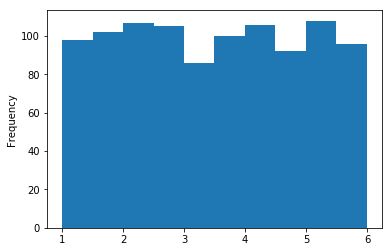

In [129]:
# Uniform distribution
UnifDist = pd.Series(np.random.uniform(high=6,low=1,size=1000))
UnifDist.plot(kind="hist")

In [131]:
Data = pd.Series(np.random.normal(loc=200,scale=50,size=10000))
# sd = scale
# mean = loc
# size

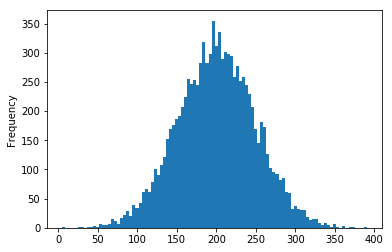

In [132]:
Data.plot(kind="hist",bins=100)

In [137]:
stores.groupby(["StoreType","StoreName"])[["StoreType"]].count().add_prefix("CountOf_").reset_index().pivot("StoreType","StoreName")

CountOf_StoreType                                               \
StoreName         Apparel Zone Central Store Digital Bazar Electronics Zone   
StoreType                                                                     
Apparel                    8.0           NaN           NaN              NaN   
Electronincs               NaN           NaN           4.0              4.0   
Super Market               NaN           4.0           NaN              NaN   

                                                     
StoreName    Fashion Bazar Super Bazar Super Market  
StoreType                                            
Apparel                4.0         NaN          NaN  
Electronincs           NaN         NaN          NaN  
Super Market           NaN         4.0          4.0

In [138]:
stores2 = stores # shallow copy (shortcut)

In [139]:
stores2["dummy"] = 0

In [140]:
stores2

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,dummy
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0


In [141]:
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,dummy
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0


In [142]:
stores3 = stores.copy(deep=True)

In [143]:
stores3["dummy2"] = "abc"
stores3

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,dummy,dummy2
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0,abc
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0,abc
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0,abc
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0,abc
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0,abc
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0,abc
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0,abc
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0,abc
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0,abc
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0,abc


In [144]:
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,dummy
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,0
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,0
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,0
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,0
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,0
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,0
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,0


# H1
## H2
### H3